In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [27]:
df=pd.read_csv('Compiled_descriptors.csv')

In [28]:
df=df.iloc[:,1:]

In [29]:
df['IC50']=pd.read_csv('IC50 (1).csv')

In [30]:
l=[]
l=abs(df.corr()['IC50']).sort_values(ascending=False).head(6).index.to_list()

In [31]:
abs(df.corr()['Class']).sort_values(ascending=False).head(30)

Class             1.000000
IC50              0.539985
C-005             0.332119
C-016             0.311954
MATS2p            0.299658
MATS2i            0.280997
GATS2i            0.278562
SdsCH             0.266876
GATS2p            0.262576
CATS2D_04_DA      0.256093
PCR               0.248253
T(O..F)           0.244306
Eig02_EA(dm)      0.237744
Chi1_EA(dm)       0.231772
P_VSA_s_4         0.231527
MATS2m            0.223484
rGes              0.221581
VE3sign_Dz(p)     0.218329
VE3sign_D/Dt      0.216734
MATS2v            0.213380
T(F..F)           0.211714
SpDiam_AEA(bo)    0.207810
nR=Cs             0.207775
SpMax8_Bh(s)      0.207234
DBI               0.207177
P_VSA_e_2         0.206867
P_VSA_i_2         0.200047
MCD               0.198936
P_VSA_v_3         0.198890
SpMAD_EA(dm)      0.198775
Name: Class, dtype: float64

In [32]:
mod_df=df[l]

In [33]:
x=mod_df.drop('IC50',axis=1)
y=mod_df['IC50']


In [21]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\Akshat\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=3)

In [35]:
clf1=LinearRegression()
clf2=RandomForestRegressor()
clf3=GradientBoostingRegressor()
clf4=AdaBoostRegressor()

In [41]:
lst=[]


In [48]:
lst.append(np.mean(cross_val_score(clf4,x_train,y_train,cv=10,scoring='r2')))

In [49]:
lst

[0.4372125193508931,
 0.37302697053665124,
 0.3970952491089218,
 0.11539080572616489]

(0.0, 38000.0)

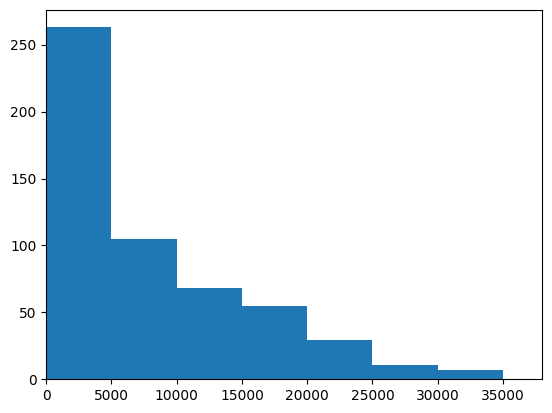

In [30]:
plt.hist(df['IC50'],bins=20)
plt.xlim(0,38000)

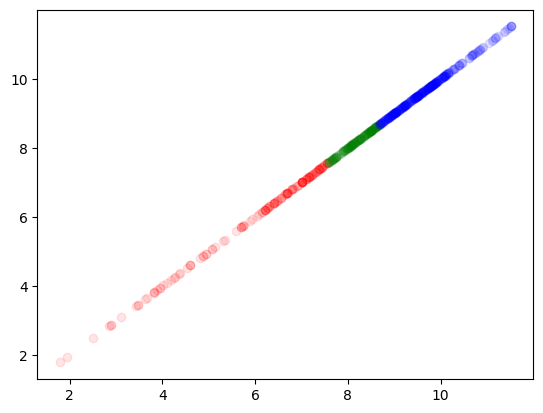

In [38]:
plt.scatter(df1[df['Class']==0]['IC50'],df1[df['Class']==0]['IC50'],color='red', alpha=0.1)
plt.scatter(df1[df['Class']==1]['IC50'],df1[df['Class']==1]['IC50'],color='green',alpha=0.1)
plt.scatter(df1[df['Class']==2]['IC50'],df1[df['Class']==2]['IC50'],color='blue',alpha=0.1)
#plt.xlim(2500,30000)
#plt.ylim(2500,30000)
#plt.grid()

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scalar=MinMaxScaler()

In [22]:
df1=pd.read_csv('for_regression1.csv')

In [23]:
df1=df1.iloc[:,1:]
df1['IC50']=mod_df['IC50']

In [35]:
x_1=df1.drop('IC50',axis=1)
y_1=df1['IC50']


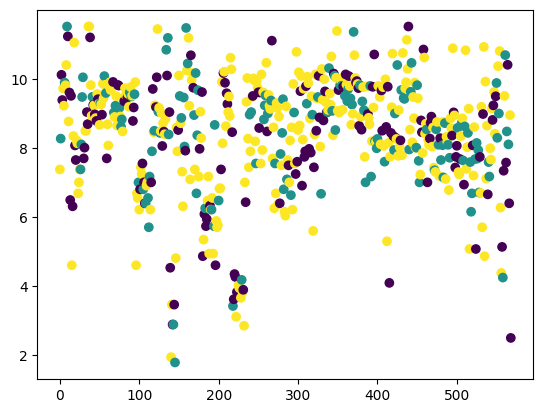

In [40]:
plt.scatter(y=df1['IC50'],x=range(0,569),c=df1['Class'])
#plt.ylim(0,35000)

In [43]:
df1[df1['Class']==2]['IC50'].sort_values(ascending=False)

36     11.512925
37     11.512925
123    11.439279
349    11.382817
162    11.183032
         ...    
228     3.662535
141     3.465736
222     3.115292
232     2.854169
140     1.945910
Name: IC50, Length: 284, dtype: float64

In [27]:
df1['IC50']=np.log(df1['IC50'])

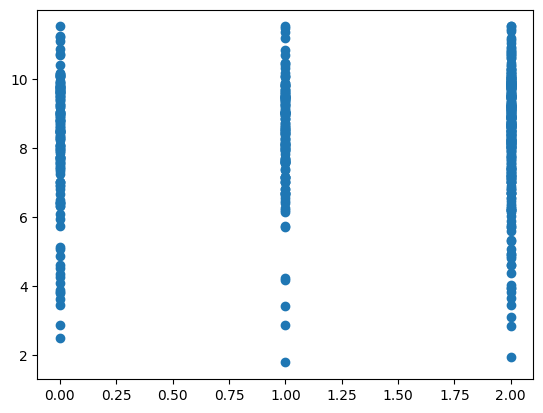

In [44]:
plt.scatter(df1['Class'],df1['IC50'])

In [55]:
plotting=pd.DataFrame(columns=['Accuracy','Mod'])

In [57]:
plotting['Accuracy']=lst
plotting['Mod']=['RandomForestRegressor','LinearRegression', 'GradientBoostingRegressor', 'AdaBoostRegressor']

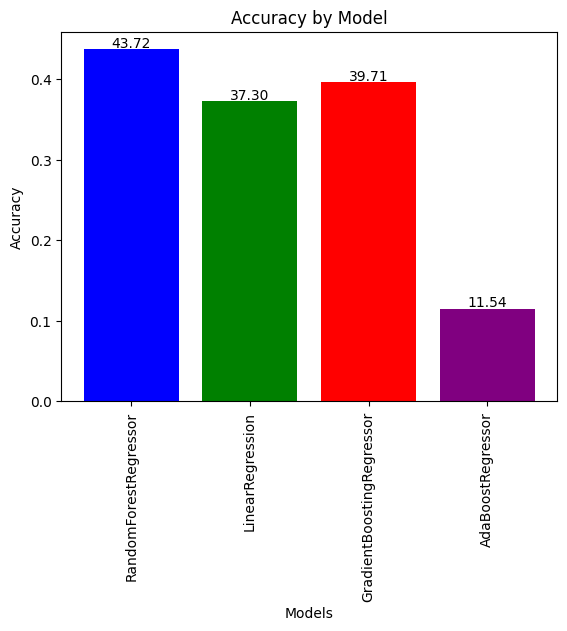

In [65]:
# Define a color list
colors = ['blue', 'green', 'red', 'purple']  # Adjust colors and length as needed

# Create the bar plot with custom colors
plt.bar(x=plotting['Mod'], height=plotting['Accuracy'], color=colors[:len(plotting['Mod'])])

# Rotate x-axis labels (optional)
plt.xticks(rotation='vertical')  
for i, (v, label) in enumerate(zip(plotting['Accuracy'], plotting['Mod'])):
  y_pos = v + 0.002  # Adjust y position for label placement
  plt.text(i, y_pos, f"{v*100:.2f}", ha='center')  # Format accuracy with 2 decimal places


# Add accuracy labels using plt.text (optional)
# ... (code for adding accuracy labels remains the same)

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy by Model")
plt.show()